Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Timofey Solovev"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        self.n = len(xk)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        
        L = 0
        for j in range(self.n):
            p1 = 1
            p2 = 1
            for i in range(self.n):
                if i == j:
                    continue
                p1 *= (x - self.xk[i])
                p2 *= (self.xk[j] - self.xk[i])
            L += self.yk[j] * p1 / p2
        return L

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


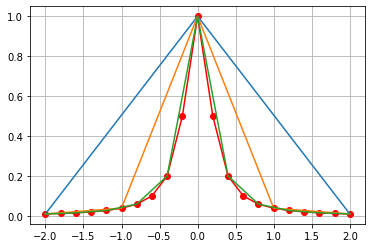

In [4]:
import matplotlib.pyplot as plt

x3 = np.linspace(-2, 2, 3)
x5 = np.linspace(-2, 2, 5)
x7 = np.linspace(-2, 2, 7)
x11 = np.linspace(-2, 2, 11)

y3 = [lagr(xval) for xval in x3]
y5 = [lagr(xval) for xval in x5]
y7 = [lagr(xval) for xval in x7]
y11 = [lagr(xval) for xval in x11]

plt.plot(xx, yy, "ro-")
plt.plot(x3, y3)
plt.plot(x5, y5)
# plt.plot(x7, y7)
plt.plot(x11, y11)
plt.grid()
plt.show()

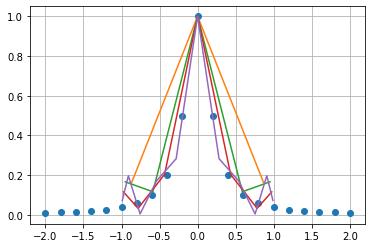

In [5]:
import math

def chebyshev(x, n):
    x = []
    for k in range(1, n + 1):
        x.append(np.cos((2 * k - 1) / (2 * n) * math.pi))
    return np.array(x)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

plt.plot(xx, yy, "o")
for elm in [3, 5, 7, 11]:
    x_new = chebyshev(xx, elm)
    y_new = [lagr(xval) for xval in x_new]
    plt.plot(x_new, y_new)

plt.grid()
plt.show()